## Parse file for allele frequency, read depth, genotype quality

In [13]:
vcf = open('/Users/cmdb/qbb2020-answers/lab2/freebayes_output/annotated.vcf')

read_depth = []
genotype_qual = []
allele_data = []
allele_frequency = []
effects_data = []

# Iterate through VCF file
for line in vcf:
    
    # Skip header
    if (line[0] == '#'):
        continue 
    
    # Extract INFO and FORMAT data
    data = line.split('\t')
    format_fields = data[9:]
    info_fields = data[7].split(';')
    #print(format_fields)
    
    # Get allele frequency data
    if info_fields[3] != '.':
        # Remove AF = from the index corresponding to allele freq
        allele_data.append(info_fields[3].strip('AF='))
    
    # Go to index with variant effect data, split on | and create list
    if info_fields[-1] != '.':
        effects_data.append(info_fields[-1].split('|'))
            
    # Iterate through information in FORMAT
    for format_data in format_fields:
        f_data = format_data.split(':')
        #print(f_data)
        
        # Get read depth information
        if (f_data[2] != '.'):
            read_depth.append(float(f_data[2]))
            
            # Get genotype quality information
            if (f_data[1] != '.'):
                genotype_qual.append(float(f_data[1]))

vcf.close()

# OUTSIDE FOR LOOP, PARSE LISTS SOME MORE

# ALLELE FREQUENCIES

# Account for some allele frequencies having multiple values, and split them 
part = [a_data for a_data in allele_data]
allele_freq = [x for xs in part for x in xs.split(',')]
        
# Convert to float
allele_frequency = [float(i) for i in allele_freq]

# VARIANT EFFECTS

# Remove data that does not start with ANN=
effects_list = [x for x in effects_data if 'ANN=' in x[0]]

# Append all effects, which appear every 15 indexes at 1
total_effects = [line[1::15] for line in effects_list]

# Make a flat list of all the sublists
flat_list = [item for items in total_effects for item in items]

# Make sure there are no empty items
flat_list = [x for x in flat_list if x]

from collections import Counter

# Make dictionary where key is variant effect, value is frequency
count_effects = dict(Counter(flat_list).items())
# Turn into list for plotting
effects = list(count_effects.keys())
values = list(count_effects.values())

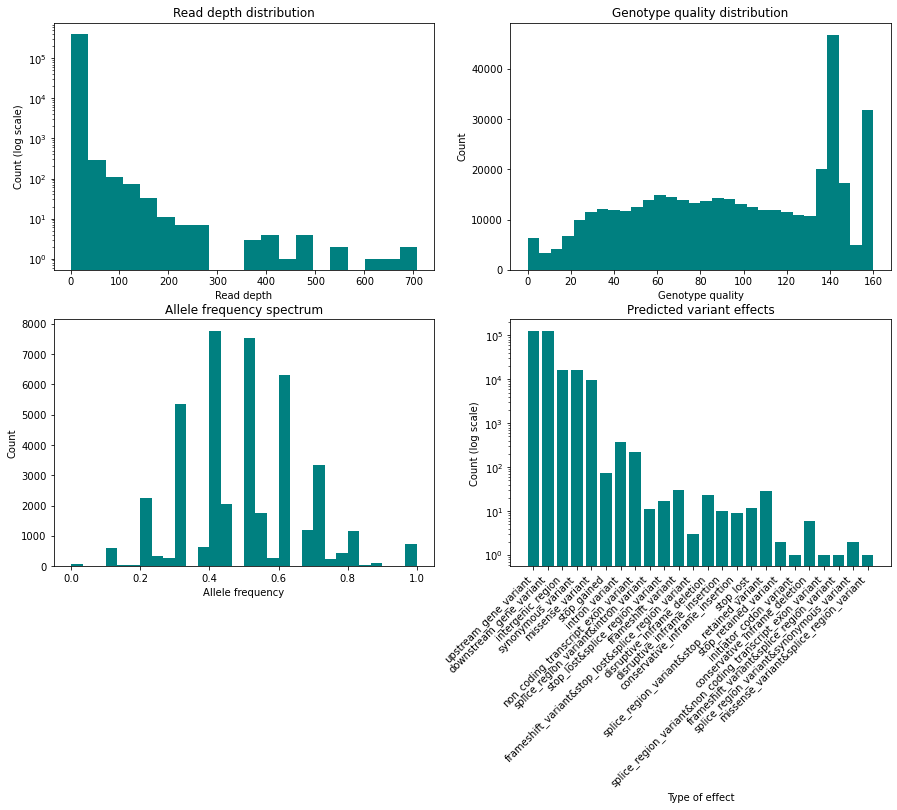

In [14]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(15,10))

ax[0, 0].hist(read_depth, bins=20, facecolor='teal')
ax[0, 0].set_xlabel('Read depth')
ax[0, 0].set_ylabel('Count (log scale)')
ax[0, 0].set_title('Read depth distribution')
ax[0, 0].set_yscale('log')

ax[0, 1].hist(genotype_qual, bins=30, facecolor='teal')
ax[0, 1].set_xlabel('Genotype quality')
ax[0, 1].set_ylabel('Count')
ax[0, 1].set_title('Genotype quality distribution')

ax[1, 0].hist(allele_frequency, bins=30, facecolor='teal')
ax[1, 0].set_xlabel('Allele frequency')
ax[1, 0].set_ylabel('Count')
ax[1, 0].set_title('Allele frequency spectrum')

ax[1, 1].bar(effects,values,facecolor='teal')
ax[1, 1].set_xlabel('Type of effect')
ax[1, 1].set_ylabel('Count (log scale)')
ax[1, 1].set_title('Predicted variant effects')
ax[1, 1].set_yscale('log')
ax[1, 1].set_xticks(effects)
ax[1, 1].set_xticklabels(effects, rotation=45, ha='right')

plt.savefig('lab2_figures.png',bbox_inches='tight')
plt.show()